In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler

In [31]:
df=pd.read_csv('stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [34]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [35]:
#preprocessing pod budowę modelu 

df['gender']=df['gender'].replace(['Male', 'Female', 'Other'],[1,2,3])
df['ever_married']=df['ever_married'].replace(['Yes', 'No'], [1,2])
df['work_type']=df['work_type'].replace(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],[1,2,3,4,5])
df['Residence_type']=df['Residence_type'].replace(['Urban', 'Rural'], [1,2])
df['smoking_status']=df['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[1,2,3])
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)

In [36]:
df.smoking_status.value_counts()

1.0    1892
2.0     885
3.0     789
Name: smoking_status, dtype: int64

In [37]:
bmi_mean=df.bmi.mean()
values={'bmi':int(bmi_mean)}
df=df.fillna(value=values)
df.bmi.isnull().any()

False

In [38]:
df=df.dropna()
df=df.drop('id', axis=1)

In [39]:
df.shape[0]

3566

In [40]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,2.0,1
1,2,61.0,0,0,1,2,2,202.21,28.0,1.0,1
2,1,80.0,0,1,1,1,2,105.92,32.5,1.0,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3.0,1
4,2,79.0,1,0,1,2,2,174.12,24.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,2,57.0,0,0,1,1,2,77.93,21.7,1.0,0
5105,2,80.0,1,0,1,1,1,83.75,28.0,1.0,0
5106,2,81.0,0,0,1,2,1,125.20,40.0,1.0,0
5107,2,35.0,0,0,1,2,2,82.99,30.6,1.0,0


In [41]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [42]:
scaler = RobustScaler()
X = scaler.fit_transform(X)


In [43]:
def bayes (X, Y, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = train_size, random_state = 0)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_train=gnb.predict(X_train)
    return accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)


In [44]:
train_set_sizes=[0.2, 0.4, 0.6, 0.8]
accuracy_test=[]
accuracy_train=[]


for size in train_set_sizes:
    results = bayes(X, Y, size)
    accuracy_test.append(results[0])
    accuracy_train.append(results[1])



In [45]:
accuracy_test

[0.8850332982825097,
 0.8766355140186916,
 0.8752627890679747,
 0.8781512605042017]

In [46]:
accuracy_train

[0.8877980364656382,
 0.8716690042075736,
 0.8616175783076204,
 0.8643057503506312]

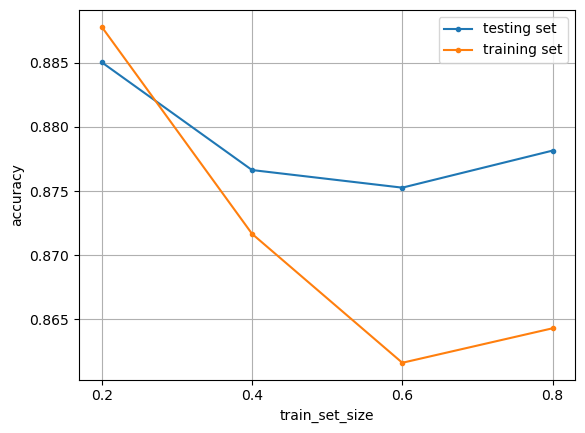

In [47]:
fig, ax = plt.subplots()
ax.plot(train_set_sizes, accuracy_test, marker='.', label='testing set')
ax.plot(train_set_sizes, accuracy_train, marker='.', label='training set')
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_xlabel('train_set_size')
ax.set_ylabel('accuracy')
ax.grid()
plt.legend()
plt.savefig('bayes_size.png')


In [48]:
def bayes (X, Y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = r_state)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_train=gnb.predict(X_train)
    return accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)

In [49]:
results_train = []
results_test = []

for i in range(50):
    results = bayes(X, Y, i)
    results_train.append(results[0])
    results_test.append(results[1])

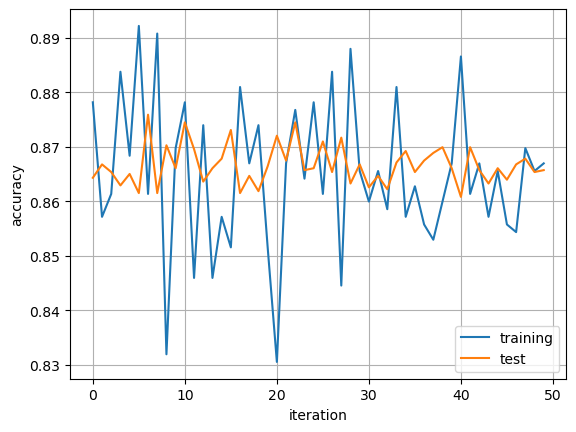

In [50]:
fig, ax = plt.subplots()

ax.plot(results_train, label="training")
ax.plot(results_test, label="test")
ax.set_xlabel("iteration")
ax.set_ylabel("accuracy")
ax.grid()
plt.legend()
plt.savefig('bayes_symulacja.png')